In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats
import datetime
import plotly.express as px

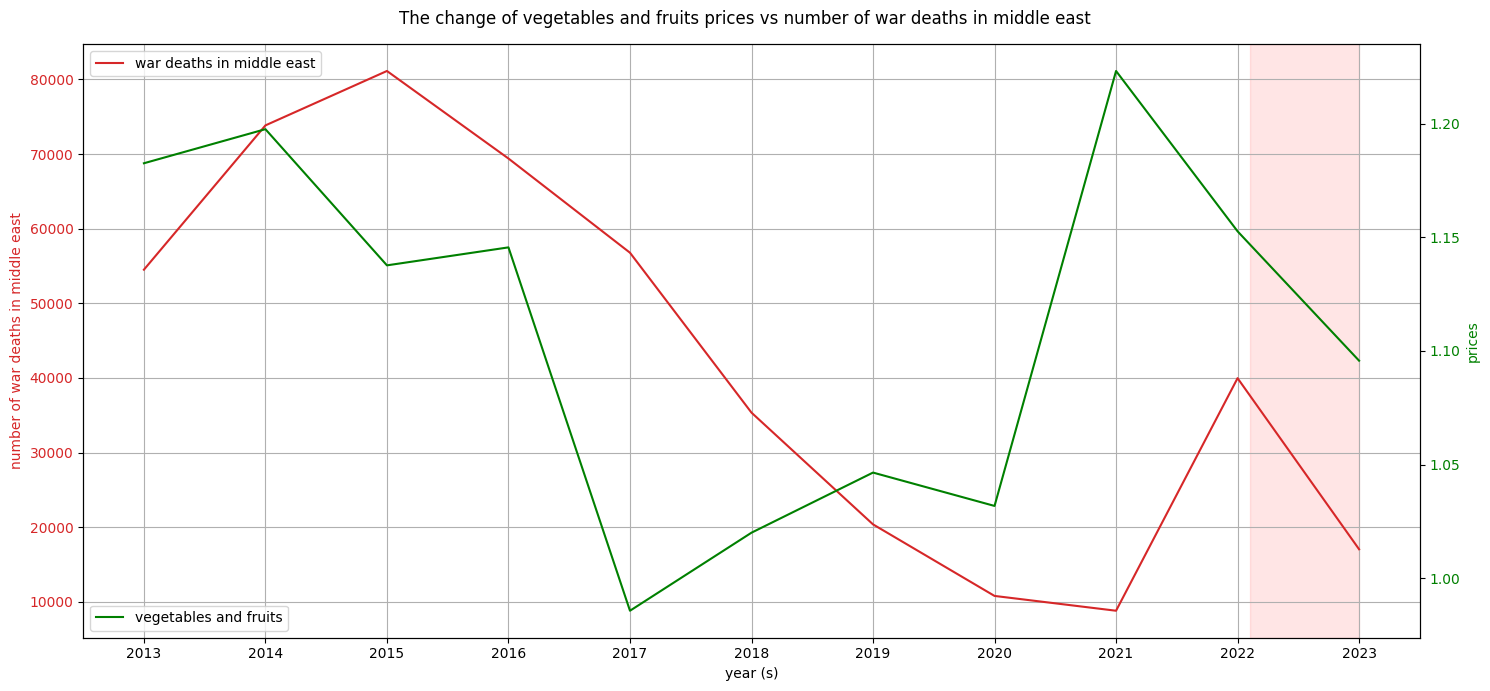

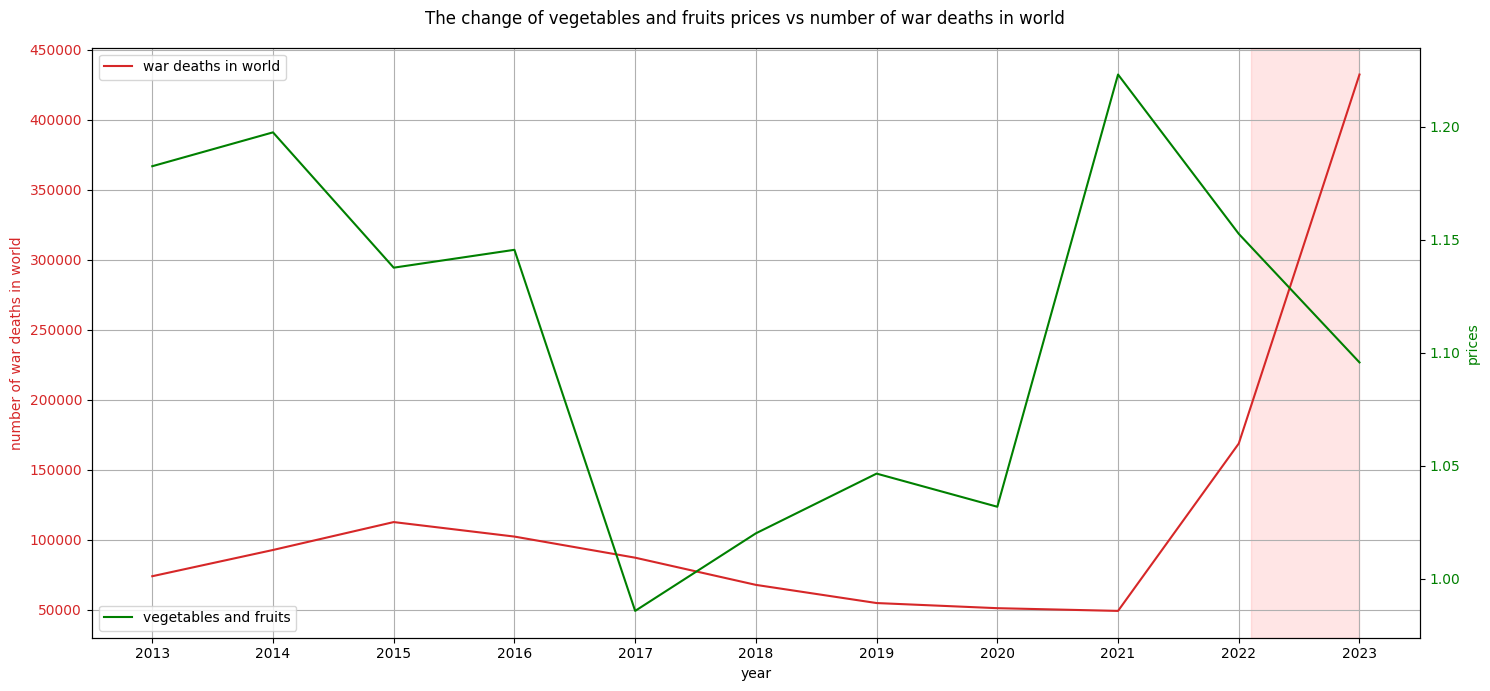

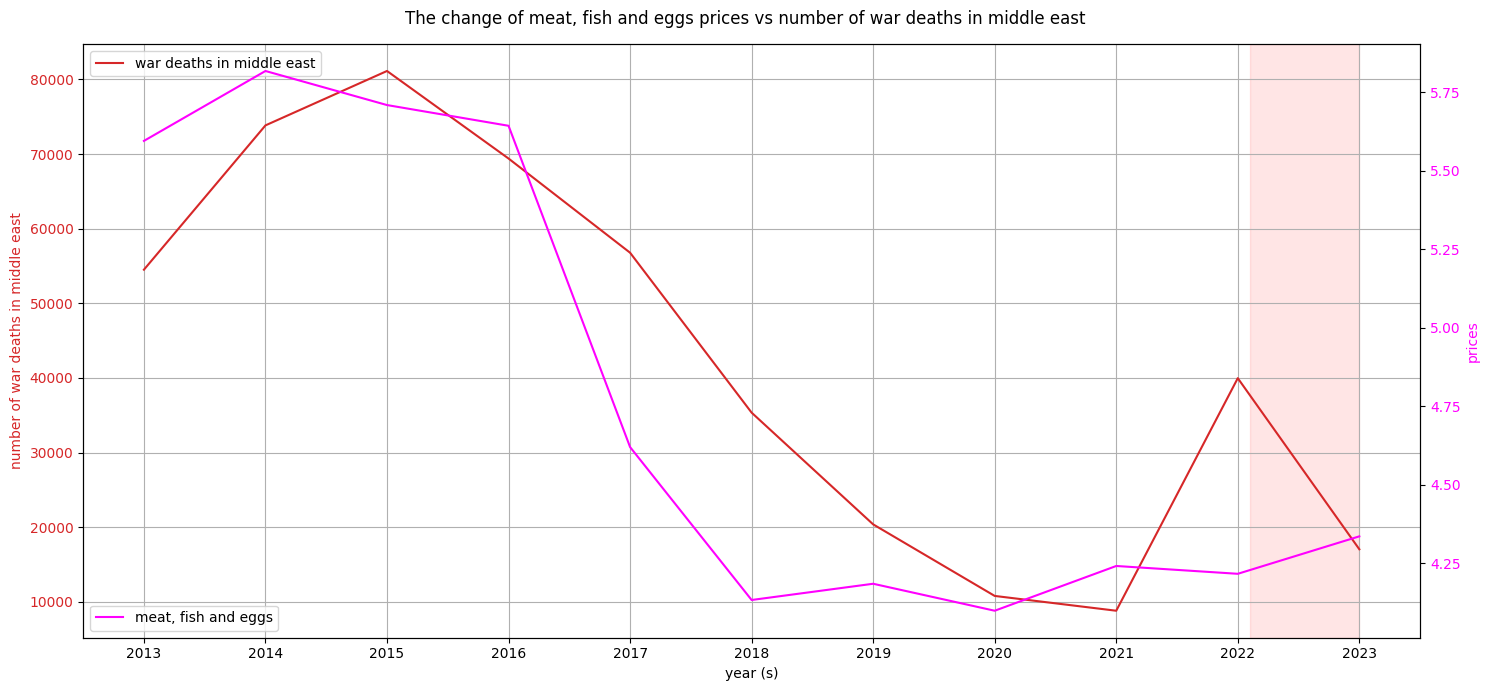

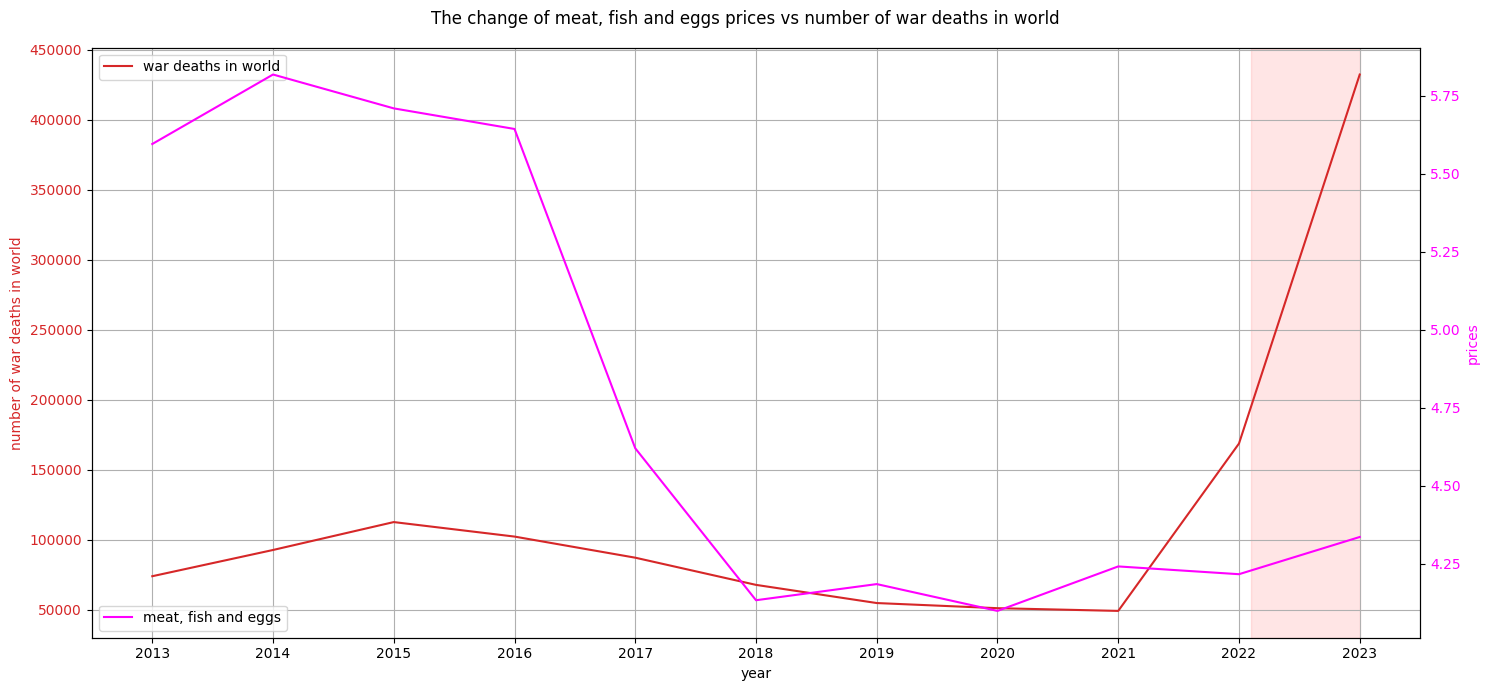

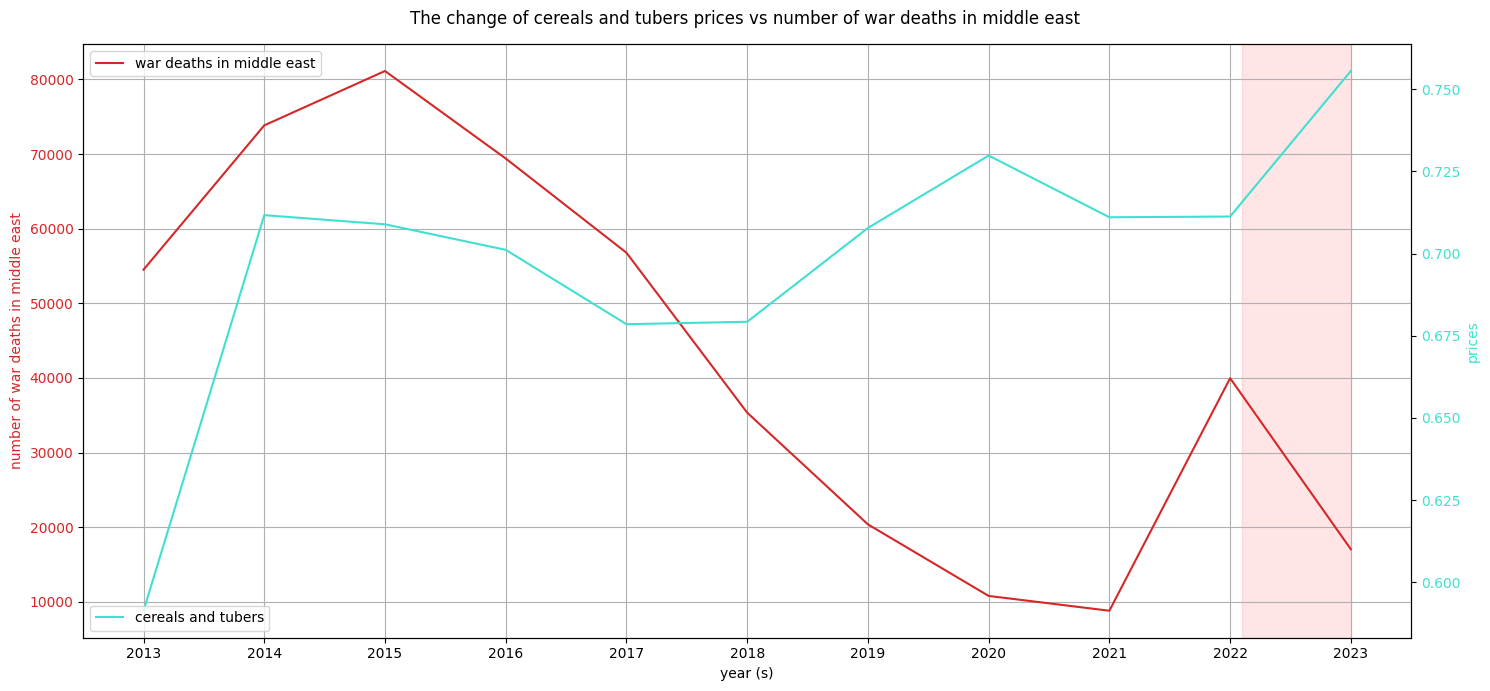

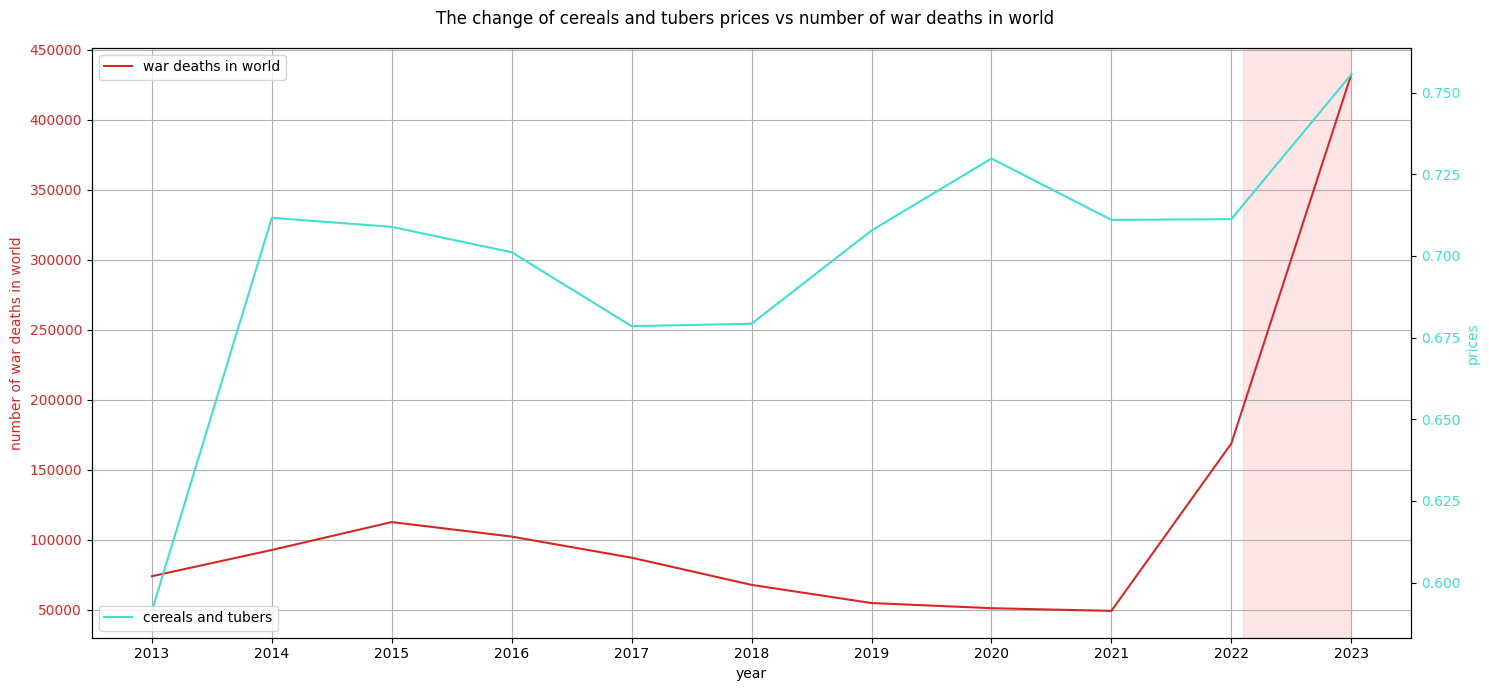

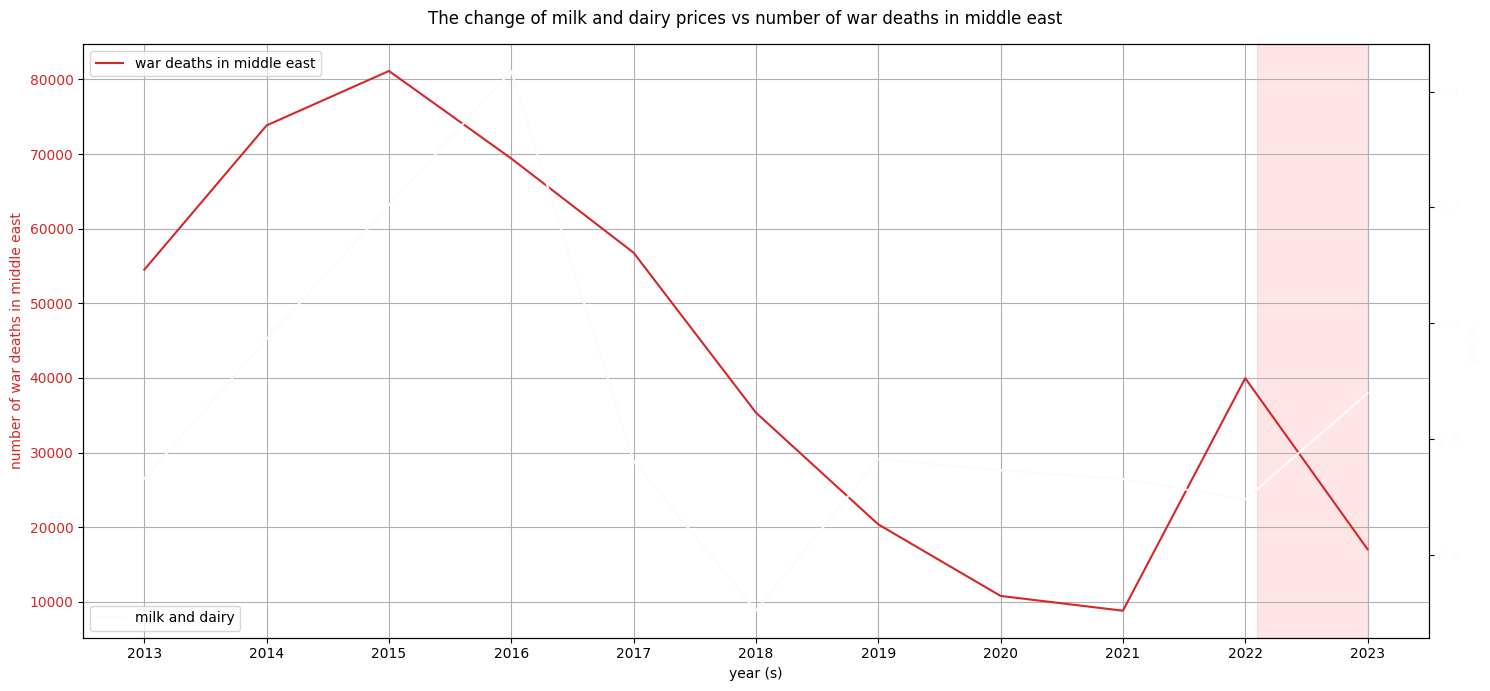

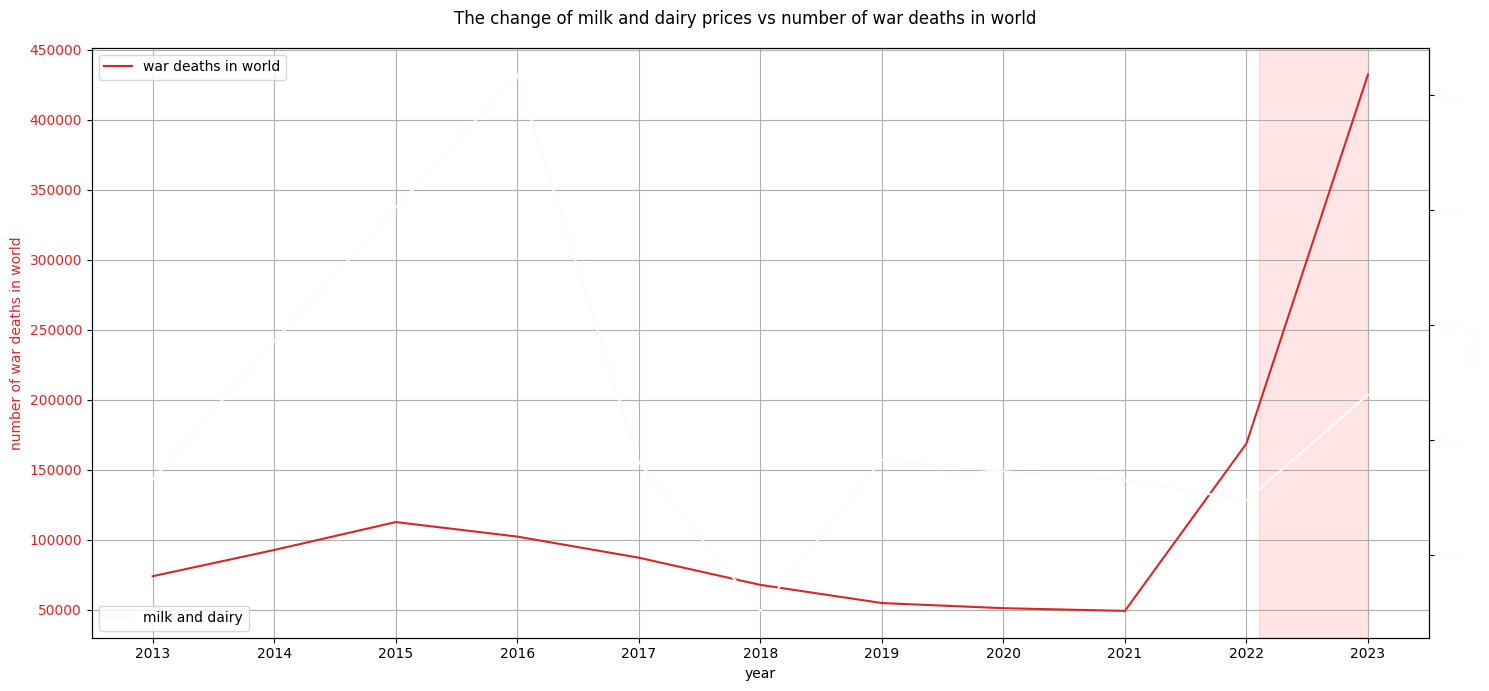

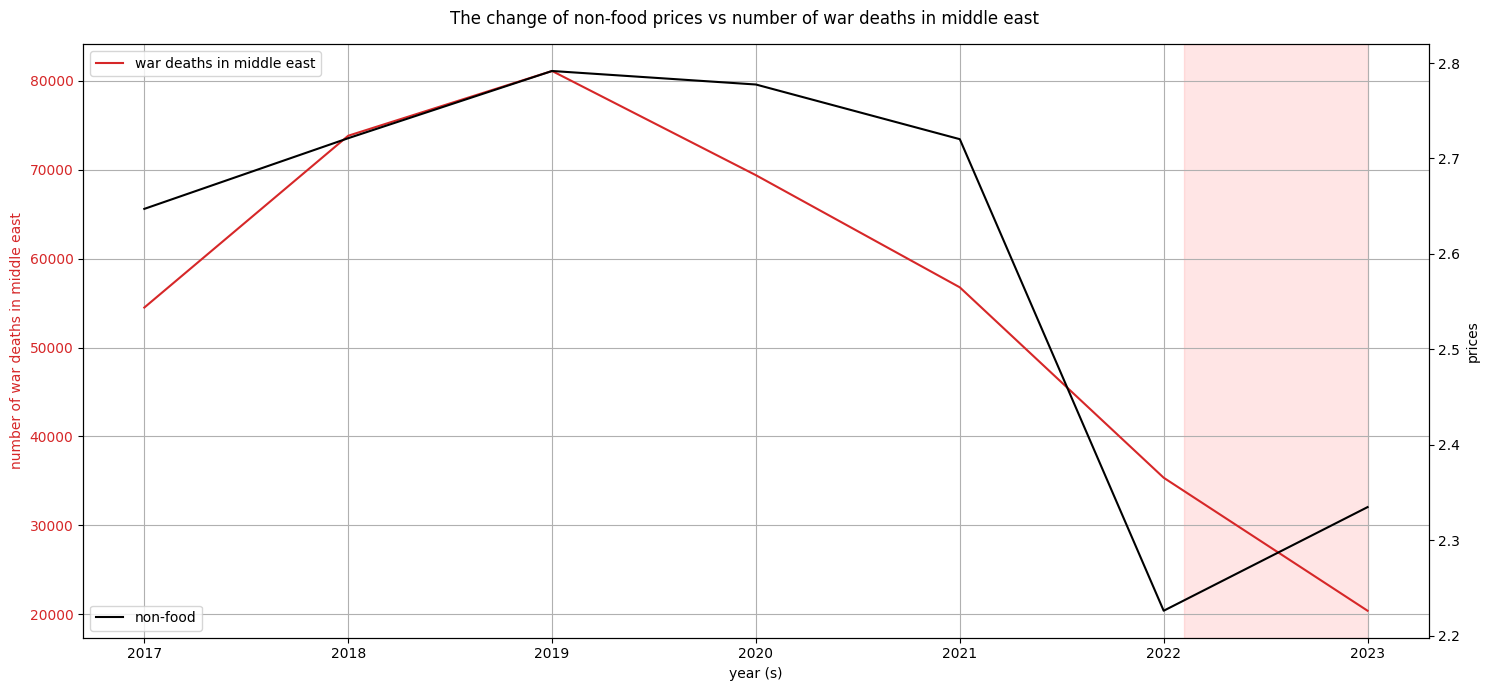

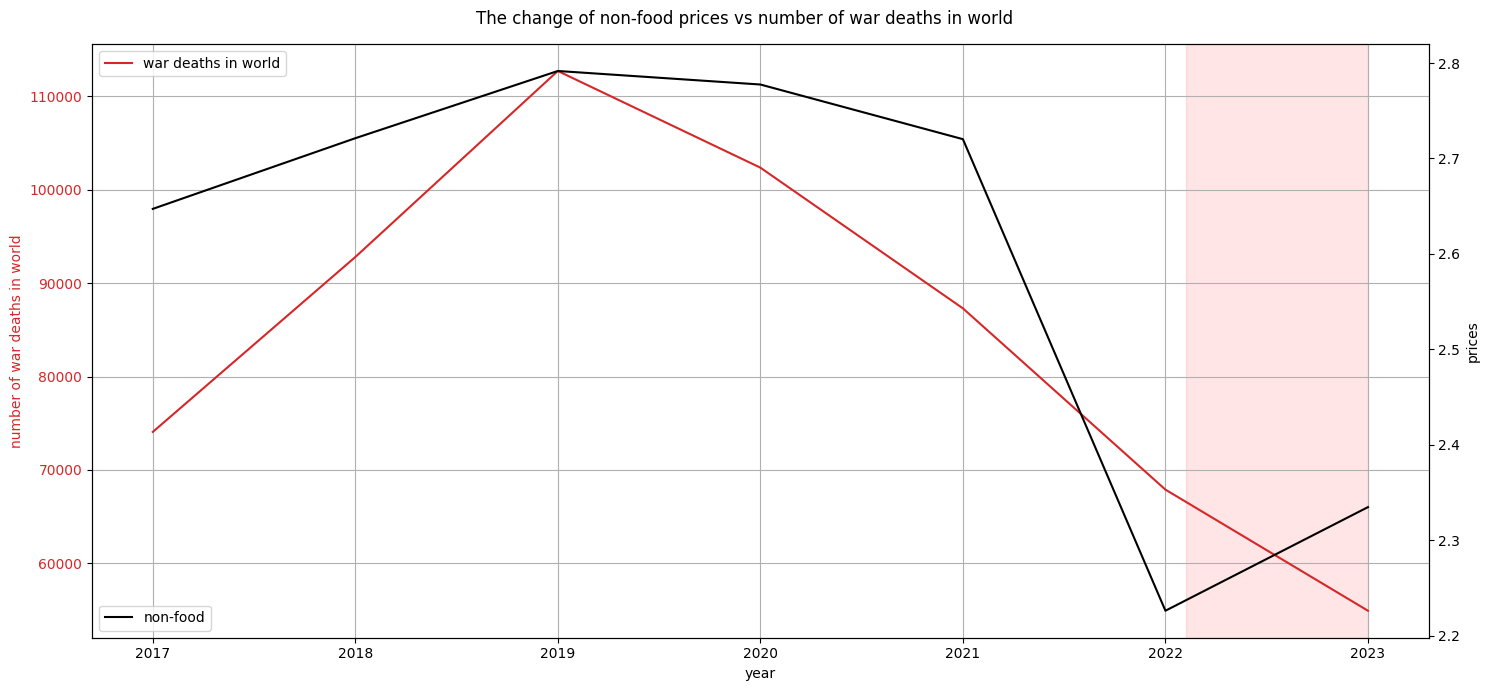

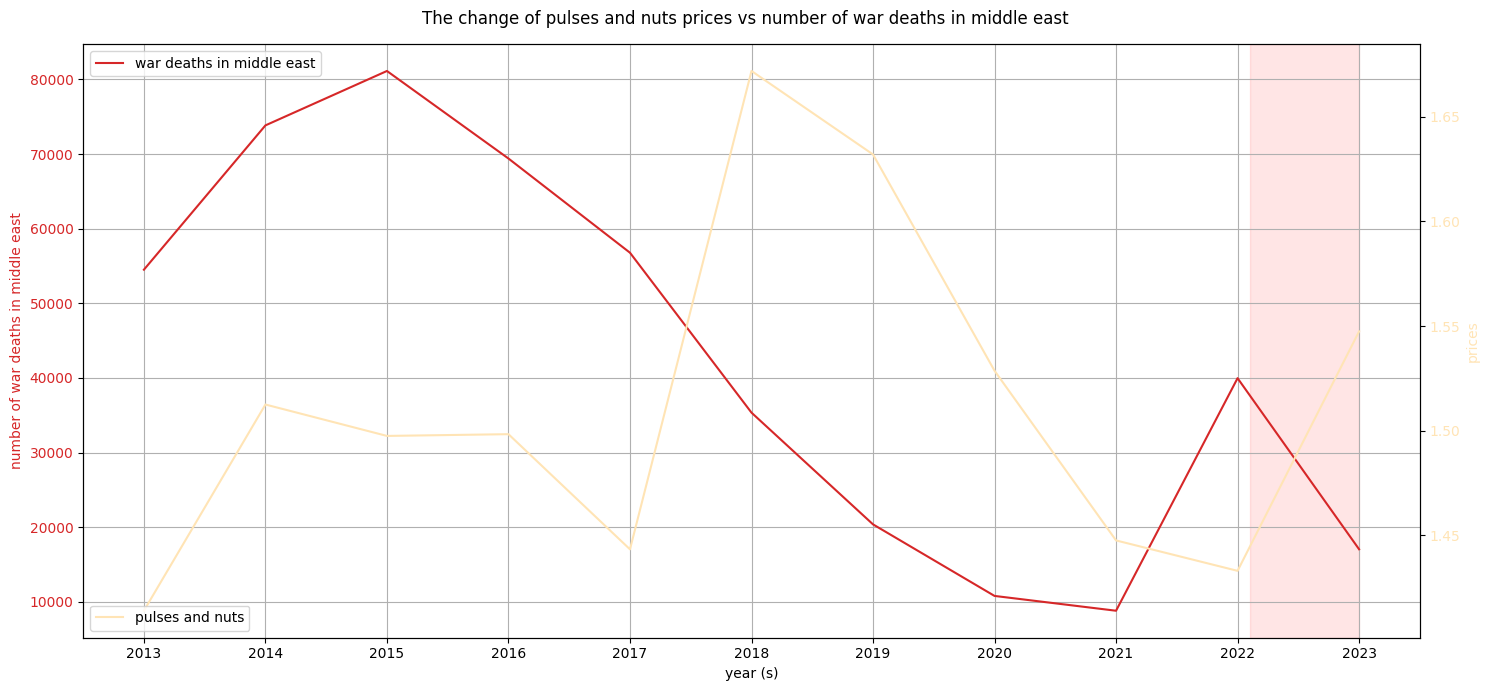

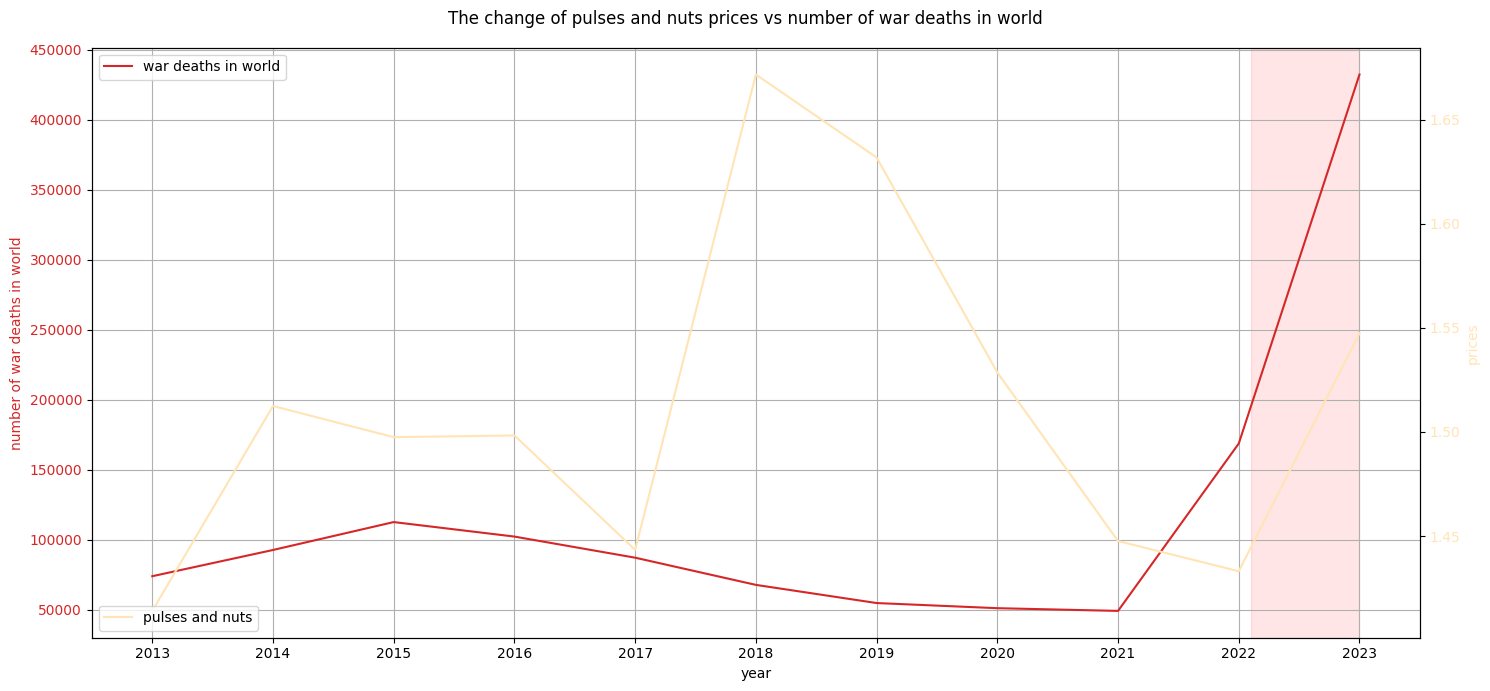

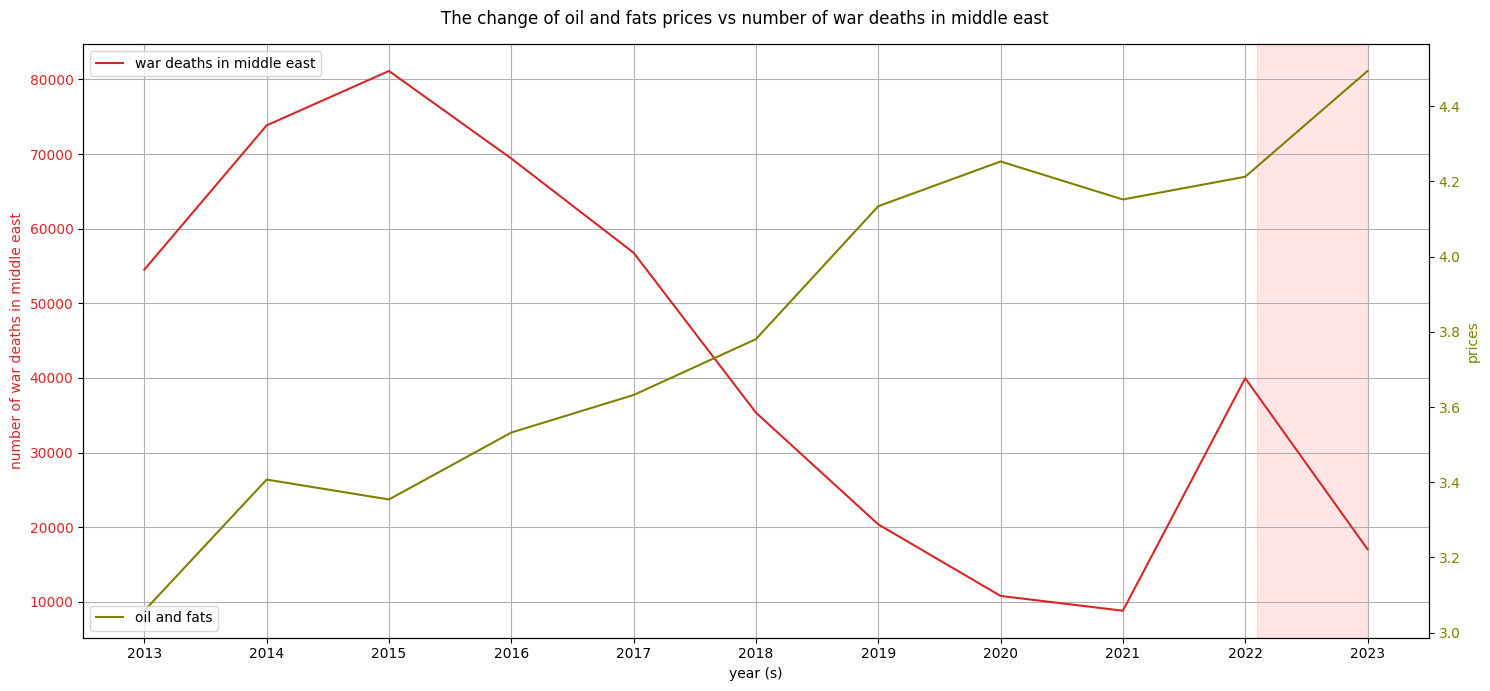

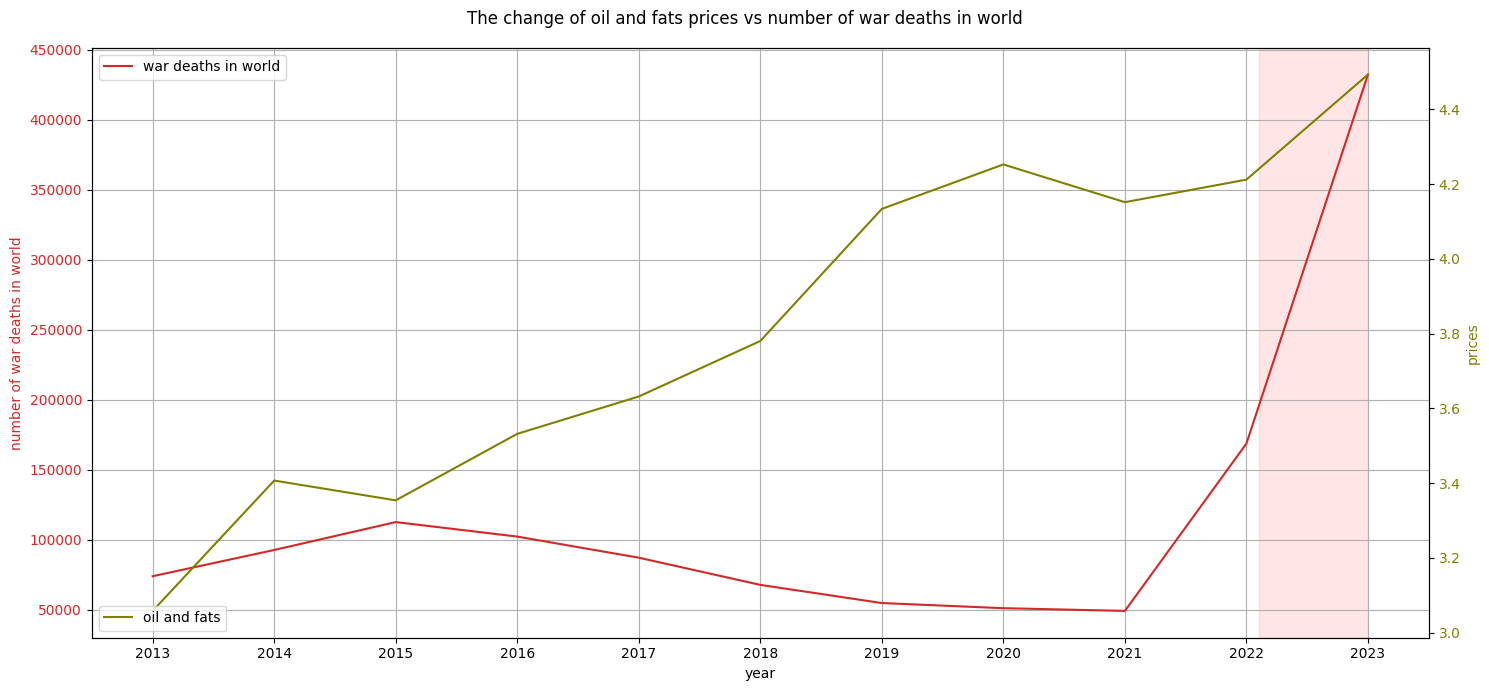

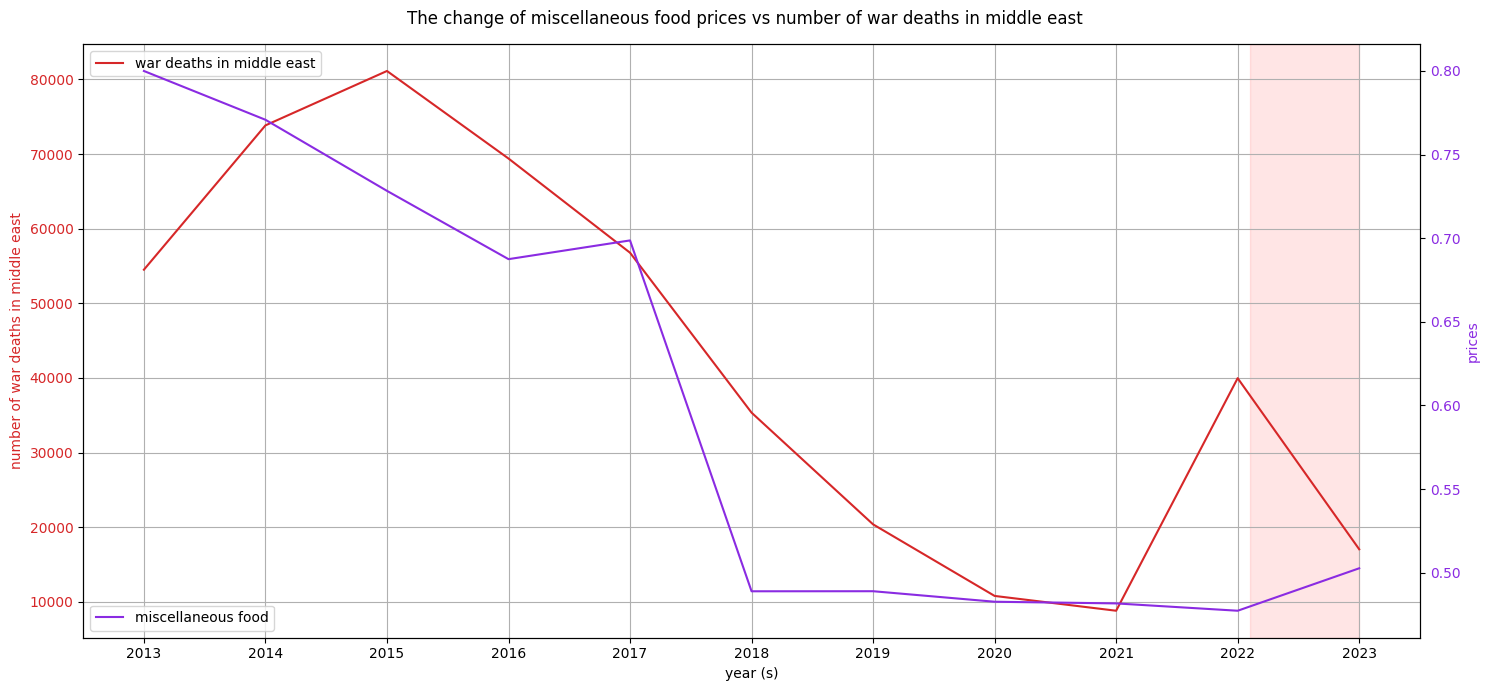

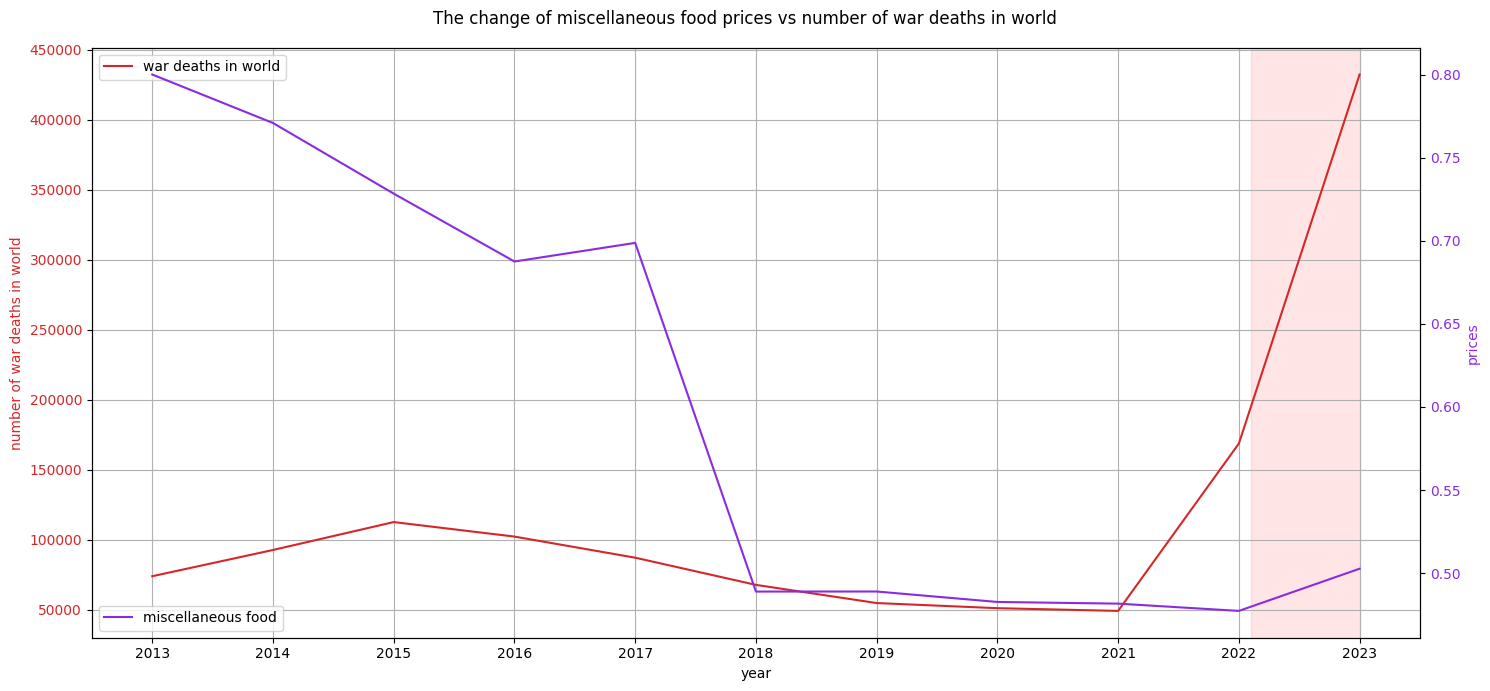

In [2]:
df=pd.read_csv('food_prices_jor.csv')
population_df=pd.read_csv("Population in Jordan.csv")
deaths_df=pd.read_excel('number of war deaths.xlsx')
jordan_covid_df=pd.read_csv('jordan-covid-data.csv')
world_covid_df=pd.read_csv('world-covid-data.csv')
df.tail(10)

catergies=df['category'].value_counts().index
inn = 0
colors =['green' , 'magenta' ,'turquoise' ,'snow','black','moccasin', 'olive','blueviolet']
# green , magenta , black , olive
# mediumblue , red
thecategory=catergies[inn]
markets=['Al Karak','Amman','Irbid' ,'Al Aqaba','Maan']



# df['year']=df['date'].apply(lambda x: int(str(x).split(sep='/')[2]))
# df['month']=df['date'].apply(lambda x: int(x.split(sep='/')[0]))
df.drop_duplicates(inplace=True) # droping the duplicates if there is any

df['date'] = pd.to_datetime(df['date']).dt.to_period('M') # to make new columns year , month
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year 

df = df.loc[df.year > 2011 ] # filltering the data 

df['H-month']=df['H-date'].apply(lambda x :int(x.split(sep='/')[1]))  # to make new columns hijri month
df['H-year']=df['H-date'].apply(lambda x :int(x.split(sep='/')[2]))  # to make new columns hijri month
df['is_ramdan']=df['H-date'].apply(lambda x :int(x.split(sep='/')[1]) in [8,9,10]) # to make new columns with true false values (true when hijri months is equal to 8,9,10)

df.drop(['H-date'],axis=1,inplace=True) # droping the un needed columns 

for i in range(len(catergies)):
    

    df=pd.read_csv('food_prices_jor.csv')
    population_df=pd.read_csv("Population in Jordan.csv")
    deaths_df=pd.read_excel('number of war deaths.xlsx')
    jordan_covid_df=pd.read_csv('jordan-covid-data.csv')
    world_covid_df=pd.read_csv('world-covid-data.csv')
    df.tail(10)

    catergies=df['category'].value_counts().index
    inn = 0
    colors =['green' , 'magenta' ,'turquoise' ,'snow','black','moccasin', 'olive','blueviolet']
    # green , magenta , black , olive
    # mediumblue , red
    thecategory=catergies[inn]
    markets=['Al Karak','Amman','Irbid' ,'Al Aqaba','Maan']


    thecategory = catergies[i]
    inn = i


    # df['year']=df['date'].apply(lambda x: int(str(x).split(sep='/')[2]))
    # df['month']=df['date'].apply(lambda x: int(x.split(sep='/')[0]))
    df.drop_duplicates(inplace=True) # droping the duplicates if there is any

    df['date'] = pd.to_datetime(df['date']).dt.to_period('M') # to make new columns year , month
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year 

    df = df.loc[df.year > 2011 ] # filltering the data 

    df['H-month']=df['H-date'].apply(lambda x :int(x.split(sep='/')[1]))  # to make new columns hijri month
    df['H-year']=df['H-date'].apply(lambda x :int(x.split(sep='/')[2]))  # to make new columns hijri month
    df['is_ramdan']=df['H-date'].apply(lambda x :int(x.split(sep='/')[1]) in [8,9,10]) # to make new columns with true false values (true when hijri months is equal to 8,9,10)

    df.drop(['H-date'],axis=1,inplace=True) # droping the un needed columns 

    population_df=df[(df['category']==thecategory) ].groupby('year')['price'].mean().reset_index(name='avg_prices').join(population_df).drop('Year',axis=1)
    population_df['annual_change_avg_prices']=population_df['avg_prices'].pct_change(periods=1)*100
    # | (df['commodity']=='Rice (imported)') | (df['category']=='vegetables and fruits')


    deaths_df=df[(df['category']==thecategory)].groupby('year')['price'].mean().reset_index(name='avg_prices').join(deaths_df).drop('Year',axis=1)


    jordan_covid_df.fillna(0,inplace=True) # replace nulls with 0

    jordan_covid_df.fillna(0,inplace=True) # replace nulls with 0

    jordan_covid_df['date'] = pd.to_datetime(jordan_covid_df['date'], format='%m/%d/%Y').dt.to_period('M')

    jordan_covid_df.drop(columns=['iso_code','continent','location'],axis=1,inplace=True) # drop the unneeded columns

    jordan_covid_df=jordan_covid_df.groupby('date')[['new_cases','new_deaths']].sum().reset_index(names=['date','new_cases','new_deaths']) # calculating the new cases and deaths for every month

    jordan_covid_df['avg_prices']=df[(df['category']==thecategory)].groupby(['year','month'])['price'].mean().reset_index(name='avg_prices').drop(['year','month'],axis=1)

    jordan_covid_df['monthly_change_avg_prices']=jordan_covid_df['avg_prices'].pct_change(periods=1)*100
    jordan_covid_df['monthly_change_new_cases']=jordan_covid_df['new_cases'].pct_change(periods=1)*100
    jordan_covid_df['monthly_change_new_deaths']=jordan_covid_df['new_deaths'].pct_change(periods=1)*100



    world_covid_df.fillna(0,inplace=True) # replace nulls with 0

    world_covid_df.fillna(0,inplace=True) # replace nulls with 0

    world_covid_df['date'] = pd.to_datetime(world_covid_df['date'], format='%m/%d/%Y').dt.to_period('M')

    world_covid_df.drop(columns=['iso_code','continent','location'],axis=1,inplace=True) # drop the unneeded columns

    world_covid_df=world_covid_df.groupby('date')[['new_cases','new_deaths']].sum().reset_index(names=['date','new_cases','new_deaths']) # calculating the new cases and deaths for every month

    world_covid_df['avg_prices']=df[(df['category']==thecategory)].groupby(['year','month'])['price'].mean().reset_index(name='avg_prices').drop(['year','month'],axis=1)

    world_covid_df['monthly_change_avg_prices']=world_covid_df['avg_prices'].pct_change(periods=1)*100
    world_covid_df['monthly_change_new_cases']=world_covid_df['new_cases'].pct_change(periods=1)*100
    world_covid_df['monthly_change_new_deaths']=world_covid_df['new_deaths'].pct_change(periods=1)*100




    t = deaths_df['year']+1
    data2 = deaths_df['avg_prices']
    data1 = deaths_df['middle_east']

    fig, ax1 = plt.subplots()
    fig.set_figwidth(15)
    fig.set_figheight(7)
    fig.suptitle("The change of "+thecategory+" prices vs number of war deaths in middle east")

    color = 'tab:red'
    ax1.set_xlabel('year (s)')
    ax1.set_xticks(t)
    ax1.axvspan(2022.1, 2023, alpha=0.1, color='r')

    # ax1.set_xticklabels(t,rotation = 45)
    ax1.set_ylabel('number of war deaths in middle east', color=color)
    ax1.plot(t, data1, color=color, label="war deaths in middle east")
    ax1.tick_params(axis='y', labelcolor=color)
    # ax1.set_ylim([0,max(data1)+max(data1)*0.05])
    plt.legend(loc="upper left")
    plt.grid()

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = colors[inn]
    ax2.set_ylabel('prices', color=color)  # we already handled the x-label with ax1
    ax2.plot(t, data2, color=color, label=thecategory)
    ax2.tick_params(axis='y', labelcolor=color)
    # ax2.set_ylim([0,max(data2)+max(data2)*0.05])

    # ax2.set_ylim([0,10])
    plt.legend(loc="lower left")

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    # plt.savefig(thecategory+'middle east war'+'.png')




    t = deaths_df['year']+1
    data2 = deaths_df['avg_prices']
    data1 = deaths_df['world']

    fig, ax1 = plt.subplots()
    fig.set_figwidth(15)
    fig.set_figheight(7)
    fig.suptitle("The change of "+thecategory+" prices vs number of war deaths in world")

    color = 'tab:red'
    ax1.set_xlabel('year')
    ax1.set_xticks(t)
    ax1.axvspan(2022.1, 2023, alpha=0.1, color='r')

    # ax1.set_xticklabels(t,rotation = 45)
    ax1.set_ylabel('number of war deaths in world', color=color)
    ax1.plot(t, data1, color=color, label="war deaths in world")
    ax1.tick_params(axis='y', labelcolor=color)
    # ax1.set_ylim([0,max(data1)+max(data1)*0.05])
    plt.legend(loc="upper left")
    plt.grid()

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = colors[inn]
    ax2.set_ylabel('prices', color=color)  # we already handled the x-label with ax1
    ax2.plot(t, data2, color=color, label=thecategory)
    ax2.tick_params(axis='y', labelcolor=color)
    # ax2.set_ylim([0,max(data2)+max(data2)*0.05])
    plt.legend(loc="lower left")

    # ax2.set_ylim([0,10])


    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    # plt.savefig(thecategory+'world war'+'.png')



    # df2=df[df['category']==thecategory].groupby(['H-year','H-month'])['price'].mean().reset_index(name='price_change')
    # df2["date"] = (df2["H-month"].astype(str) + "-" + df2["H-year"].astype(str)).apply(lambda x : (datetime.datetime.strptime(x,"%m-%Y")).strftime("%Y-%m"))
    # # df['date']=pd.to_datetime(df2['date'].index,format='%m-%Y')
    # # df2.price_change=df2.price_change.pct_change()*100



    # fig, axs = plt.subplots(len(df2['H-year'].unique())//4, 4, figsize=(18, 10), constrained_layout=True)
    # fig.suptitle('comparison of '+ thecategory +' prices over 12 years in Hijri',fontsize=20)
    # for ax,i in  zip(axs.flat,df2['H-year'].unique()):
    #     data=df2[df2['H-year']==i]
    #     x=data['H-month']
    #     y=data['price_change']
    #     ax.plot(x,y,color=colors[inn])
    #     ax.grid()
    #     ax.set_xlabel('months')
    #     ax.set_ylabel('prices')
    #     ax.axvspan(8, 10, alpha=0.2, color='green')
    #     ax.set_xlim([1,12])
    #     ax.set_ylim([1.5,4.7])
    #     # ax.set_ylim([min(y)-.1,max(y)+.1])
    #     # ax.set_xlabel(range(1,13,1))
    #     ax.set_title(i)